# 規則設定與產生測資

## 問題：
預測該男性目前是否單身？ 是 1、否 0

## 特徵：
* 年齡：18 ~ 30
* 身高：160 ~ 200 cm
* 體重：50 ~ 110 kg
* 學歷：高中 1、學士 2、碩士 3、博士 4
* 有無近視：有 1、無 0
* 有無交往過：有 1、無 0
* 平均月收入：0 ~ 100000 NT
* 平均每周運動時數：0 ~ 25 hr

先隨機產生 10000 筆測資

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randint

In [2]:
size = 10000
data = pd.DataFrame(index=np.arange(size))
data['single'] = randint(0, 2, size)
data['age'] = randint(18, 31, size)
data['height'] = randint(160, 201, size)
data['weight'] = randint(50, 110, size)
data['education'] = randint(1, 5, size)
data['nearsighted'] = randint(0, 2, size)
data['dated'] = randint(0, 2, size)
data['income'] = randint(0, 100001, size)
data['exercise'] = randint(0, 26, size)
data.head()

,single,age,height,weight,education,nearsighted,dated,income,exercise
0,1,28,183,77,1,0,1,9230,18
1,0,18,184,55,4,1,1,41792,0
2,1,22,172,102,1,1,1,97167,15
3,0,22,180,101,2,0,0,78420,21
4,1,27,169,80,4,1,1,58192,23


## 規則：

### 非單身：
1. 年齡 <= 25 且 身高 >= 190
2. 年齡 <= 20 且 體重 <= 60 且 近視 0
3. 年齡 >= 26 且 學歷 >= 3 且 交往過 1
4. 年齡 >= 26 且 學歷 >= 3 且 近視 0
5. 年齡 <= 22 且 近視 0 且 交往過 1
6. 年齡 <= 22 且 平均月收入 >= 35000
7. 身高 >= 180 且 體重 70 ~ 80
8. 身高 >= 175 且 學歷 >= 3
9. 學歷 >= 2 且 平均月收入 >= 80000
10. 學歷 <= 2 且 平均每周運動時數 >= 20
11. 近視 0 且 平均每周運動時數 >= 10
12. 交往過 0 且 平均月收入 >= 50000

刪除符合卻單身的資料

In [3]:
# 年齡 <= 25 且 身高 >= 190
mask1 = data['single'] == 1
mask2 = data['age'] <= 25
mask3 = data['height'] >= 190
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 年齡 <= 20 且 體重 <= 60 且 近視 0
mask1 = data['single'] == 1
mask2 = data['age'] <= 20
mask3 = data['weight'] <= 60
mask4 = data['nearsighted'] == 0
temp = data[mask1 & mask2 & mask3 & mask4]
print(len(temp))
data.drop(temp.index, inplace=True)

# 年齡 >= 26 且 學歷 >= 3 且 交往過 1
mask1 = data['single'] == 1
mask2 = data['age'] >= 26
mask3 = data['education'] >= 3
mask4 = data['dated'] == 1
temp = data[mask1 & mask2 & mask3 & mask4]
print(len(temp))
data.drop(temp.index, inplace=True)

# 年齡 >= 26 且 學歷 >= 3 且 近視 0
mask1 = data['single'] == 1
mask2 = data['age'] >= 26
mask3 = data['education'] >= 3
mask4 = data['nearsighted'] == 0
temp = data[mask1 & mask2 & mask3 & mask4]
print(len(temp))
data.drop(temp.index, inplace=True)

# 年齡 <= 22 且 近視 0 且 交往過 1
mask1 = data['single'] == 1
mask2 = data['age'] <= 22
mask3 = data['nearsighted'] == 0
mask4 = data['dated'] == 1
temp = data[mask1 & mask2 & mask3 & mask4]
print(len(temp))
data.drop(temp.index, inplace=True)

# 年齡 <= 22 且 平均月收入 >= 35000
mask1 = data['single'] == 1
mask2 = data['age'] <= 22
mask3 = data['income'] >= 35000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 身高 >= 180 且 體重 70 ~ 80
mask1 = data['single'] == 1
mask2 = data['height'] >= 180
mask3 = (data['weight'] >= 70) & (data['weight'] <= 80)
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 身高 >= 175 且 學歷 >= 3
mask1 = data['single'] == 1
mask2 = data['height'] >= 175
mask3 = data['education'] >= 3
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 學歷 >= 2 且 平均月收入 >= 80000
mask1 = data['single'] == 1
mask2 = data['education'] >= 2
mask3 = data['income'] >= 80000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 學歷 <= 2 且 平均每周運動時數 >= 20
mask1 = data['single'] == 1
mask2 = data['education'] <= 2
mask3 = data['exercise'] >= 20
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 近視 0 且 平均每周運動時數 >= 10
mask1 = data['single'] == 1
mask2 = data['dated'] == 0
mask3 = data['exercise'] >= 10
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 交往過 0 且 平均月收入 >= 50000
mask1 = data['single'] == 1
mask2 = data['dated'] == 0
mask3 = data['income'] >= 50000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

846
83
450
269
291
655
179
404
186
294
373
103


後面數字越大，表示有越多模糊的規則，通常是範圍較大的特徵所致

### 單身：
1. 年齡 >= 26 且 學歷 1 且 近視 1
2. 身高 <= 170 且 體重 >= 80
3. 身高 >= 190 且 體重 <= 65
4. 身高 <= 170 且 學歷 1
5. 體重 >= 100 且 平均月收入 <= 70000
6. 體重 >= 80 平均每周運動時數 <= 2
7. 學歷 == 4 且 平均月收入 <= 50000
8. 學歷 <= 2 且 平均月收入 <= 20000
9. 近視 1 且 平均每周運動時數 <= 5
10. 交往過 0 且 平均月收入 <= 30000


刪除符合卻非單身的資料

In [4]:
# 年齡 >= 26 且 學歷 1 且 近視 1
mask1 = data['single'] == 0
mask2 = data['age'] >= 26
mask3 = data['nearsighted'] == 1
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 身高 <= 170 且 體重 >= 80
mask1 = data['single'] == 0
mask2 = data['height'] <= 170
mask3 = data['weight'] >= 80
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 身高 >= 190 且 體重 <= 65
mask1 = data['single'] == 0
mask2 = data['height'] >= 190
mask3 = data['weight'] <= 65
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 身高 <= 170 且 學歷 1
mask1 = data['single'] == 0
mask2 = data['height'] <= 170
mask3 = data['education'] == 1
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 體重 >= 100 且 平均月收入 <= 70000
mask1 = data['single'] == 0
mask2 = data['weight'] >= 100
mask3 = data['income'] <= 70000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 體重 >= 80 平均每周運動時數 <= 2
mask1 = data['single'] == 0
mask2 = data['weight'] >= 80
mask3 = data['exercise'] <= 2
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 學歷 == 4 且 平均月收入 <= 50000
mask1 = data['single'] == 0
mask2 = data['education'] == 4
mask3 = data['income'] <= 50000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 學歷 <= 2 且 平均月收入 <= 20000
mask1 = data['single'] == 0
mask2 = data['education'] <= 2
mask3 = data['income'] <= 20000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 近視 1 且 平均每周運動時數 <= 5
mask1 = data['single'] == 0
mask2 = data['nearsighted'] == 0
mask3 = data['exercise'] <= 5
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

# 交往過 0 且 平均月收入 <= 30000
mask1 = data['single'] == 0
mask2 = data['dated'] == 0
mask3 = data['income'] <= 30000
temp = data[mask1 & mask2 & mask3]
print(len(temp))
data.drop(temp.index, inplace=True)

968
552
272
140
397
132
318
210
242
140


數字越大，表示前面單身部分無法有效過濾掉

In [5]:
print('有效資料比率', len(data) / size)
print('剩餘資料', len(data))

有效資料比率 0.2496
剩餘資料 2496


In [6]:
data.reset_index(drop=True, inplace=True)
data.head(10)

,single,age,height,weight,education,nearsighted,dated,income,exercise
0,0,22,180,101,2,0,0,78420,21
1,0,18,195,93,1,1,0,92541,4
2,0,21,187,71,4,0,0,73943,15
3,0,22,167,76,2,1,1,82518,25
4,1,30,175,94,2,0,1,56948,4
5,0,30,189,84,4,0,1,61317,16
6,1,25,165,88,2,1,1,67522,4
7,1,25,163,101,4,0,1,67062,11
8,0,21,165,53,2,0,0,82118,16
9,0,18,183,59,4,1,0,83887,24


# 建立與分析決策樹

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

隨機取 30% 資料訓練，特徵為除 single 外欄位

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[1:]], data['single'], test_size=0.3, random_state=None)

In [9]:
x_train.head()

,age,height,weight,education,nearsighted,dated,income,exercise
1432,23,194,84,2,0,1,22010,21
494,29,183,83,2,1,1,49335,1
218,19,162,63,3,1,1,20198,19
1794,19,191,78,1,0,0,84284,6
1114,25,179,98,1,1,1,61477,25


In [10]:
y_train.head()

1432    0
494     1
218     0
1794    0
1114    0
Name: single, dtype: int32

In [11]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_predict = tree.predict(x_test)
accuracy_score(y_test, y_predict)

0.835781041388518

GraphViz's executables not found

我們只安裝了 graphviz 的 lib，還需要其執行檔，沒有安裝 Anaconda 的處理方式：

1. 下載[最新版 msi](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) (目前為 2.38) 安裝於預設路徑
2. 設定 PATH：控制台 > 系統與安全 > 系統 > 進階系統設定 > 環境變數 > 使用者變數 or 系統變數 > Path
3. 加上 `'C:\Program Files (x86)\Graphviz2.38\bin'`

若不想設定也可直接執行下面此 cell

In [13]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

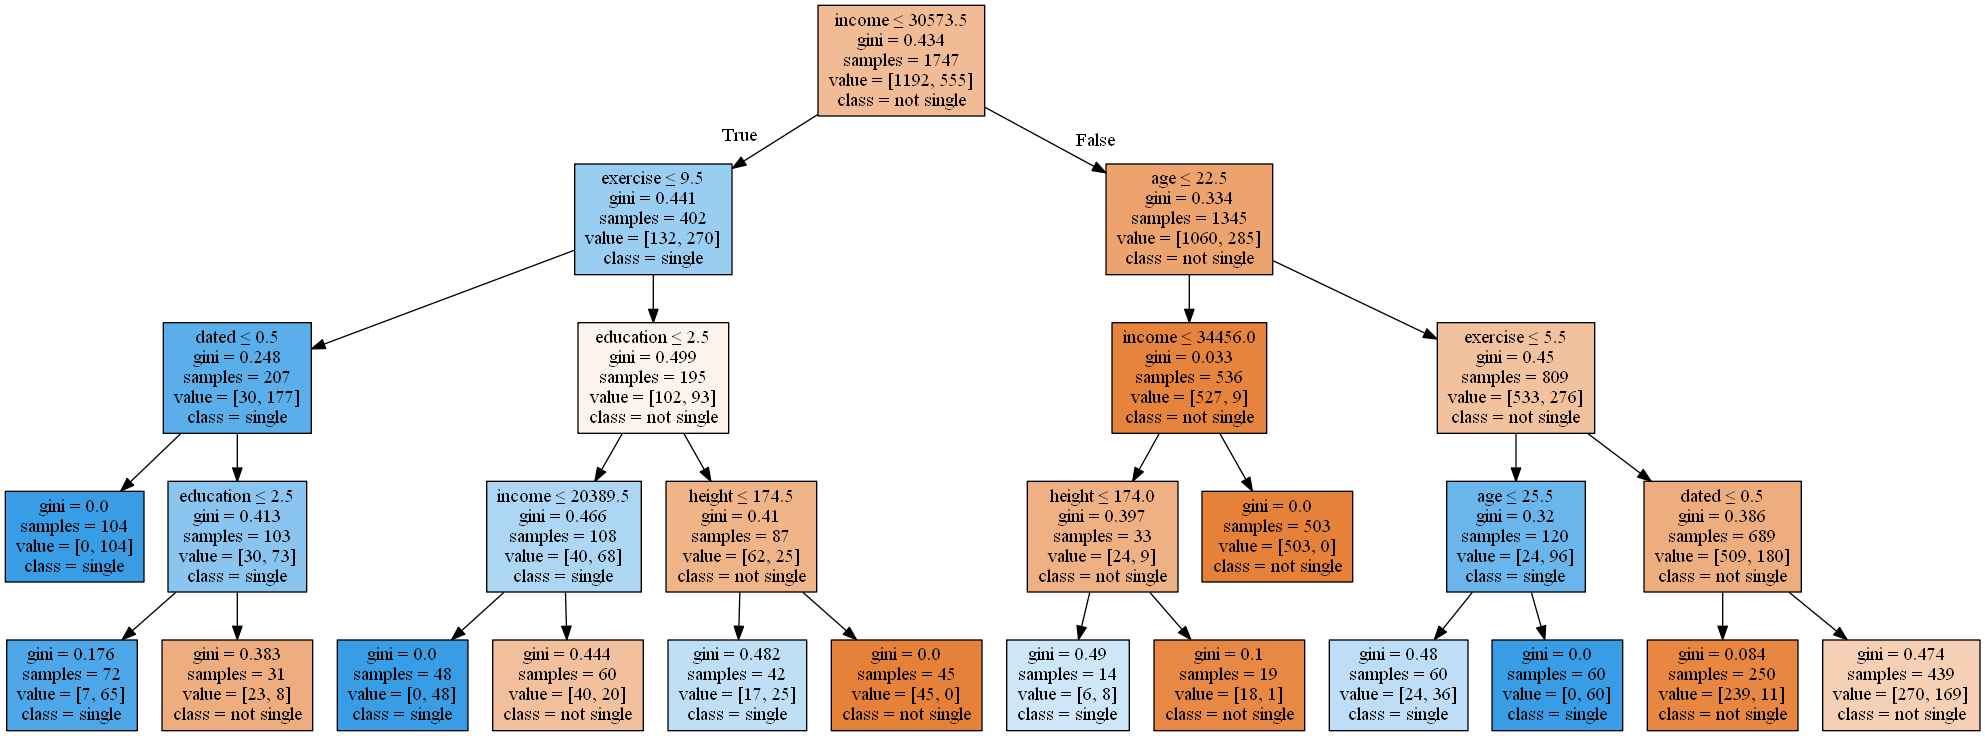

In [14]:
dot_data = export_graphviz(tree, filled=True, 
                feature_names=x_train.columns.to_list(),
                class_names=['not single', 'single'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')
Image(graph.create_png())

## 分析：
### 原特徵：
* 年齡：18 ~ 30
* 身高：160 ~ 200 cm
* 體重：50 ~ 110 kg
* 學歷：高中 1、學士 2、碩士 3、博士 4
* 有無近視：有 1、無 0
* 有無交往過：有 1、無 0
* 平均月收入：0 ~ 100000 NT
* 平均每周運動時數：0 ~ 25 hr

### 剩下的特徵：
* 年齡
* 身高
* 體重
* 學歷
* 有無交往過
* 平均月收入
* 平均每周運動時數

### 小結
* 有無近視、有無交往過，這些重複性很高，比較無法有效區分資料
* 範圍較小的特徵必須盡量出現在規則中，才會出現在決策樹中
* 如果規則訂得不夠詳細，容易只剩下身高、體重、收入與運動時數，這些非常直觀的特徵